In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(1)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')

from decodanda import decode_in_time, generate_synthetic_data_intime

## Decoding in time

Decodanda exposes a ``decoding_in_time`` function that can be used to see how the decoding performance of a given variable changes before and after a certain onset.

For this function to work, the ``data`` dictionary needs to include a ``time_from_onset`` attribute that contains negative and positive numbers.

Two important parameters of this function are ``time_boundaries`` and ``time_window``:
the first defines the minimum and maximum ``time_from_onset`` that are analyzed, the second defines a window of time that is used to perform each individual decoding analysis.

These two need to be expressed in the same unit of ``time_from_onset``. In the example below we will use integers as a unit, and decode from -9 to +12 around each onset.

The function will select all trials (with different ``trial`` number) that contain a ``time_from_onset`` that spans from -9 to +12, and perform a series of decoding analyses using data included in a sliding window of width=3.

0it [00:00, ?it/s]

times min: -9.00, max: 12.00 - 80 trials out of 80

[Decoding in time]	decoding using data in the time window: [-9.00, -6.00]


1it [00:01,  1.21s/it]

stimulus Performance: 0.45 Null: 0.50 +- 0.03 std ns

[Decoding in time]	decoding using data in the time window: [-6.00, -3.00]


2it [00:02,  1.20s/it]

stimulus Performance: 0.52 Null: 0.49 +- 0.03 std ns

[Decoding in time]	decoding using data in the time window: [-3.00, 0.00]


3it [00:03,  1.18s/it]

stimulus Performance: 0.50 Null: 0.50 +- 0.02 std ns

[Decoding in time]	decoding using data in the time window: [0.00, 3.00]


4it [00:04,  1.18s/it]

stimulus Performance: 0.62 Null: 0.50 +- 0.02 std ***

[Decoding in time]	decoding using data in the time window: [3.00, 6.00]


5it [00:05,  1.19s/it]

stimulus Performance: 0.83 Null: 0.51 +- 0.03 std ***

[Decoding in time]	decoding using data in the time window: [6.00, 9.00]


6it [00:07,  1.21s/it]

stimulus Performance: 0.78 Null: 0.50 +- 0.02 std ***

[Decoding in time]	decoding using data in the time window: [9.00, 12.00]


7it [00:08,  1.20s/it]

stimulus Performance: 0.80 Null: 0.51 +- 0.02 std ***


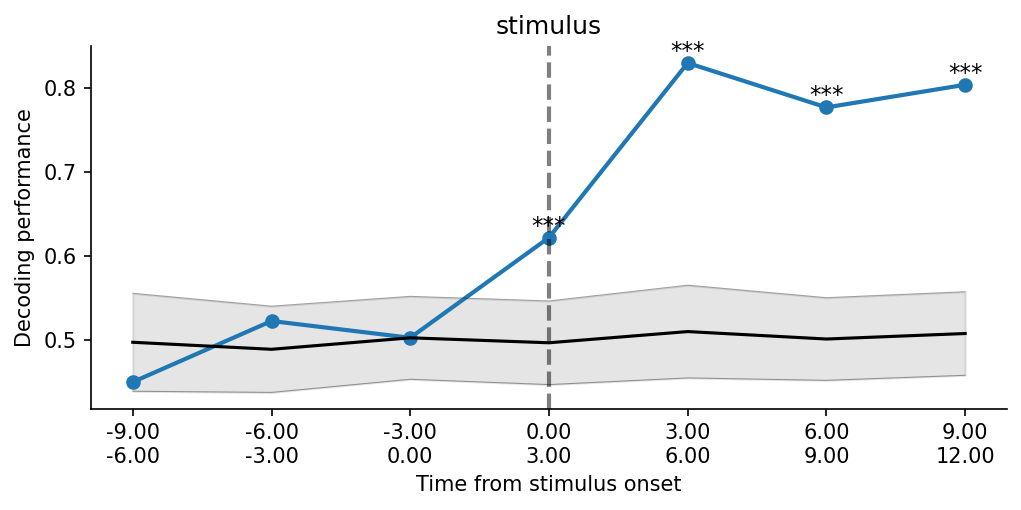

In [8]:
data = generate_synthetic_data_intime(n_neurons=100, min_time=-12, max_time=15, signal=0.2, ntrials=40)
conditions = {'stimulus': ['A', 'B']}

decodanda_params = {
    'verbose': False,
}

decoding_params = {
    'training_fraction': 0.8,
    'nshuffles': 25,
    'cross_validations': 20,
    'ndata': 100
}

perfs, null, time_points = decode_in_time(data, conditions,
                               time_attr='time_from_onset',
                               time_boundaries=[-9, 12],
                               time_window=3,
                               decoding_params=decoding_params,
                               decodanda_params=decodanda_params,
                               plot=True,
                               time_key='Time from stimulus onset')
